<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/RandomForestOnEmployee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

dataPath = "/content/sample_data/Employee_Performance.csv"


In [2]:
empData = pd.DataFrame(pd.read_csv(dataPath))
empData.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4


In [8]:
empData.shape

(1200, 28)

In [7]:
dept = empData.iloc[:,[5,27]].copy()
dept_per = dept.copy()
dept_per.shape

(1200, 2)

In [9]:

# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()


EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<BarContainer object of 1200 artists>

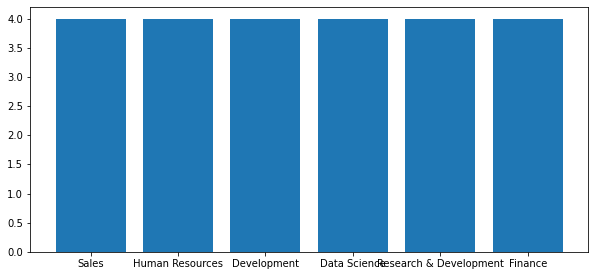

In [11]:
#Now let's visualize the department wise analysis
plt.figure(figsize=(10,4.5))
plt.bar(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

In [15]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    empData.iloc[:,i] = enc.fit_transform(empData.iloc[:,i])
empData.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3


In [30]:
# Dropping the first columns as it is of no use for analysis.
empData.drop(empData.iloc[:,0],inplace=True)
empData.head(3)


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4


In [31]:
empData.shape

(1157, 27)

In [34]:
Y = empData.loc[:,'PerformanceRating']
#for x data /for independent data
X = empData.loc[:,:'Attrition']

In [35]:
print("shape of Y ",Y.shape)
print("shape of X ",X.shape)

shape of Y  (1157,)
shape of X  (1157, 26)


In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.30,random_state=10)

In [39]:

# Let's use Standardization technique
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [40]:
#to check the shape
print("shape of xtrain ",xtrain.shape)
print("shape of xtest ",xtest.shape)
print("shape of ytrain ",ytrain.shape)
print("shape of ytest",ytest.shape)

shape of xtrain  (809, 26)
shape of xtest  (348, 26)
shape of ytrain  (809,)
shape of ytest (348,)


In [41]:
model=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

opmodel=GridSearchCV(model,parameters, scoring='accuracy',cv=10)
opmodel.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=23, n_jobs=None,
                                              oob_score=False, random_state=33,
                                  

In [42]:

opmodel.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [43]:
# Predicting the model
ypredict = opmodel.predict(xtest)

In [45]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(ytest,ypredict))


0.9367816091954023


In [46]:
confusion_matrix(ytest,ypredict)

array([[ 59,   3,   0],
       [  7, 242,   0],
       [  0,  12,  25]])